In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### Problem 4 (Morbidelli 4.26, modified)

Consider a circular fin of thickness b attached to a heated pipe with outside wall temperature $T_0$. Heat loss from the end area ($2 \pi R_1 b$) may be neglected. The ambient air is maintained at temperature $T_a$.

1. Derive an expression for the temperature profile within the fin.
2. Derive an expression for the total heat loss from the fin.
3. Derive an expression for the fin efficiency, $\eta$, which is defined as the ratio of heat actually dissipated by the fin, to that which would be lost if the entire fin surface were held at $T_0$.

**Plot the temperature profile to make sure your solution makes sense.**

The equation for heat conduction in a cylinder is:

$$\frac{1}{r}\frac{\partial}{\partial r}\bigg( r k\frac{\partial T}{\partial r} \bigg) + \frac{\partial}{\partial z}\bigg( k \frac{\partial T}{\partial z} \bigg) = 0$$

There is a convective boundary condition in z:

$$-k \frac{\partial T}{\partial z}(r, 0) = h[T_a - T(r, 0)] $$ <br>
$$-k \frac{\partial T}{\partial z}(r, b) = h[T_a - T(r, b)] $$

The BC in r is:

$$T(R_1, z) = T_0 $$ <br>
$$T is finite$$

It is hinted that we shouldn't have to solve a 2D problem here, and that we can somehow collapse the z dimension, assuming uniformity in the z direction. We need to figure out how to account for our z BCs though. The PDE becomes an ODE with the BC entering as a parameter:

$$\frac{1}{r}\frac{d}{d r}\bigg( r \frac{d T}{d r} \bigg) = \frac{h}{kb}[T_a - T] $$

This can be rewritten as:

$$r\frac{d^2T}{dr^2} + \frac{dT}{dr} + \frac{hbr}{k}(T - T_a) = 0 $$

or 

$$r^2\frac{d^2T}{dr^2} + r\frac{dT}{dr} - Bir^2(T - T_a) = 0 $$

normalizing with $\Theta = \frac{T - T_a}{T_0 - T_a}$ gives

$$r^2\frac{d^2 \Theta}{dr^2} + r\frac{d \Theta}{dr} - Bi r^2\Theta = 0 $$

Using the familiar theorem, we have, $a=1, b=0, c=0, d=-Bi, q=1, p=n$, which gives the following coefficients: $\alpha=0, \beta=0, \lambda=\sqrt{Bi}, v=0$. This gives a solution of the form:

$$\Theta (r) = c_1 I_0(\lambda r) + c_2 K_0(\lambda r) $$

The derivative is:

$$u'(r) = \lambda c_1I_1(\lambda r) + \lambda c_2K_{-1}(\lambda r) $$

Using this solution and our boundary conditions, we can solve to get:

$$c_1 = \frac{u_0}{I_0(\lambda R_1)} $$ <br>

$$c_2 = 0 $$

In [20]:
# h = 100
# k = 1
# b = 0.01
# Ta = 340
# T0 = 320
# u0 = T0 - Ta
# lam = np.sqrt(h/(k*b))
# R1 = 0.1
# R2 = 1

# c1 = u0/(jv(0, lam*R1) - 0*yv(0, lam*R1)*(jv(-1, lam*R2)/yv(-1,lam*R2)))
# c2 = -c1*(jv(-1,lam*R2)/yv(-1,lam*R2))*0

# r = np.linspace(R1,R2,501)
# u = c1*jv(0,lam*r) + c2*yv(0,lam*r)

In [66]:
c1*lam*iv(-1,0)

0.0

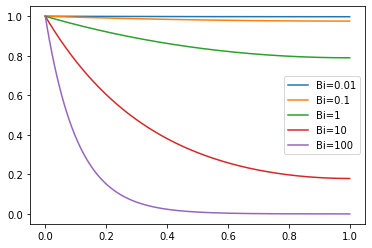

In [48]:
R = 1
r = np.linspace(0,1,501)

Bis = [0.01, 0.1, 1, 10, 100]

fig, ax = plt.subplots(figsize=(6,4))
for Bi in Bis:
    lam = np.sqrt(Bi)*R
    c1 = 1/(iv(0, lam))
    u = c1*iv(0,lam*r)
    # Note that I had to cheat here to get a solution that made sense...
    ax.plot(r[::-1], u, label=r'Bi={}'.format(Bi))

ax.legend()

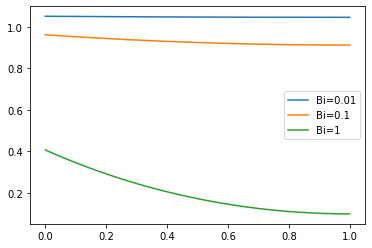

In [83]:
R = 1
h = 1
k = 1
r = np.linspace(0,1,501)
Ta = 340
T0 = 320
uf = Ta/T0

Bis = [0.01, 0.1, 1]

fig, ax = plt.subplots(figsize=(6,4))
for Bi in Bis:
    lam = np.sqrt(Bi)
    c1 = 2*uf*(h/k)/(lam*iv(-1, lam*R)+(h/k)*iv(0, lam*R))
    #c1 = (1-uf)/iv(0,0)
    u = c1*iv(0,lam*r) - uf
    ax.plot(r[::-1], u, label=r'Bi={}'.format(Bi))

ax.legend()